In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\jared\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\j

True

## Reading File and creating DataFrame

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()


In [4]:
# import pandas as pd
# wiki_files = pd.read_csv('wiki_sample.csv')
# wiki_dataframe = pd.DataFrame(wiki_files)
# wiki_dataframe

## Preprocessing and Creating Vocab

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [6]:
def apply_function(row, lenTitle):
    filtered_content = []
    for token in nltk.word_tokenize(row['content'][lenTitle:]):
        token = lemmatizer.lemmatize(token).lower()
        if token not in stop_words and token.isalnum():
           filtered_content.append(token) 
        
    return filtered_content

In [7]:
# wiki_dataframe['tokenized_content'] = wiki_dataframe.progress_apply(lambda row: apply_function(row, len(row['title']), row['id']), axis=1)

In [8]:
# wiki_dataframe.to_pickle('./wiki_dataframe')


In [9]:
import pickle5 as pickle
with open("./wiki_dataframe", "rb") as pickle_file:
  wiki_dataframe_pickle = pickle.load(pickle_file)
# wiki_dataframe_pickle = pd.read_pickle('./wiki_dataframe')

In [10]:
wiki_dataframe_pickle

,content,title,id,tokenized_content
0,Morocco–Saudi Arabia relations\r\n\r\nMoroccan...,Morocco–Saudi Arabia relations,1,"[arabian, relation, refers, current, historica..."
1,Anthony United States Post Office\r\n\r\nThe A...,Anthony United States Post Office,2,"[anthony, united, states, post, office, listed..."
2,Dumraon (Vidhan Sabha constituency)\r\n\r\nDum...,Dumraon Vidhan Sabha constituency,3,"[dumraon, vidhan, sabha, constituency, one, 24..."
3,Chaker Khazaal\r\n\r\nChaker Khazaal (born 28 ...,Chaker Khazaal,4,"[chaker, khazaal, born, 28, september, 1987, b..."
4,Vicente Pascual Pastor\r\n\r\nVicente Pascual ...,Vicente Pascual Pastor,5,"[vicente, pascual, pastor, alcoy, june, 3, 186..."
...,...,...,...,...
1286259,Toppr\r\n\r\nToppr is a product of Haygot Educ...,Toppr,1286260,"[toppr, product, haygot, education, private, l..."
1286260,Outline of education\r\n\r\nThe following outl...,Outline of education,1286261,"[following, outline, provided, overview, topic..."
1286261,Raell Padamsee\r\n\r\nRaell Padamsee is an Ind...,Raell Padamsee,1286262,"[raell, padamsee, indian, theatre, personality..."
1286262,Megan Callaway\r\n\r\nMegan Callaway is a foun...,Megan Callaway,1286263,"[megan, callaway, founder, archer, school, gir..."


In [11]:
vocab = set()
heaps_law_dataset = list()

i = 0
total_words = 0
count = 0
count2 = list() #number of times len(vocab) - past_unique_words is consistently less than 20
past_unique_words = 0
for document in tqdm(wiki_dataframe_pickle['tokenized_content']):
    if len(vocab) - past_unique_words < 20:
            count += 1
    else: 
        count = 0
    if count > 20:
        count2.append(i)
    #if i % 1000 == 0:
    heaps_law_dataset.append((total_words, len(vocab)))
    past_unique_words = len(vocab)
    i += 1
    for word in document:
        total_words += 1
        vocab.add(word)
#             if count >= 900:
#                 break
#             else:
#                 count = 0
#     else:
#         continue
#     break

100%|██████████| 1286264/1286264 [00:34<00:00, 37698.51it/s]


In [12]:
len(vocab)

1731793

In [13]:
numberSet = set()
array = [1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9, 9, 10]
for number in array:
   numberSet.add(number)
print(numberSet)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [14]:
vocab

{'erythaca',
 'sirichaya',
 'schlangenbeschwörer',
 'wirelesshd',
 'wodzinski',
 'kutbuddeen',
 'wattamolla',
 'viscidiflorella',
 'fku',
 'testana',
 'glucoheptonate',
 'zinda',
 'procedurally',
 'reflexologist',
 'žorga',
 'hierographia',
 'poele',
 'folasade',
 'ts23',
 'пехотный',
 'aboulhosn',
 'factsbook',
 'chattes',
 'ladigesi',
 'bezabde',
 'latericium',
 'trethowan',
 'eye',
 'massier',
 'f3v',
 'porphyrionea',
 'scapolite',
 'hoym',
 'saparmyrat',
 'bempton',
 'močerady',
 'eddé',
 'torenth',
 'zhongnanhai',
 '명인전',
 'mischer',
 'vahanga',
 'fawatir',
 'kfum',
 'einfluss',
 '14rpg',
 'nickles',
 '25561',
 'racilidea',
 'diopeithes',
 'nlgc',
 'guldborgsundlisten',
 'kekell',
 'gavazzeni',
 'archeologisch',
 'loukhai',
 'bassins',
 'drumalban',
 'xebres',
 'guardaporta',
 'haseena',
 'mava',
 'battaile',
 'sext',
 'covenstead',
 'ellings',
 'rottach',
 'galien',
 'xunxing',
 'migori',
 'aimeric',
 'simbarashe',
 'ах',
 'mounged',
 'θεολόγος',
 'kenehnache',
 'villania',
 'pri

In [15]:
len(heaps_law_dataset)

1286264

In [16]:
i

1286264

In [17]:
len(wiki_dataframe_pickle['tokenized_content'][0])

145

## Heaps Law

In [18]:
len(heaps_law_dataset)

1286264

In [19]:
heaps_law_dataset[len(heaps_law_dataset)-1]

(144533236, 1731793)

In [20]:
import matplotlib.pyplot as plt
import math

def heaps_law(list_to_graph):
        x = list()
        y = list()
        
        for item in list_to_graph:
            x.append(item[0])
            y.append(item[1])
            
        expected_x = list()
        expected_y = list()
        
        k = 20
        for n in range(len(list_to_graph)):
            expected_x.append(n)
            expected_y.append(math.pow(n, 0.5) * k)

        plt.loglog(x, y)
        plt.xlim(1, x[-1])
        plt.ylim(1, y[-1])
        plt.loglog(expected_x,expected_y)
        plt.xlim(1, x[-1])
        plt.ylim(1, y[-1])
        plt.savefig("heaps_law.png")

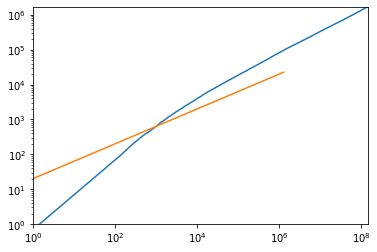

In [21]:
heaps_law(heaps_law_dataset)

## Creating Inverted Index

In [ ]:
term_doc_list = {} # term, list of documents it appears in
term_freq_list = {} # term, frequency
for word in vocab:
    for index, row in tqdm(wiki_dataframe_pickle.iterrows()):
        if word in row['content']:
            term_doc_list[word] = [row['id']]
    for term in wiki_dataframe_pickle['tokenized_content']:
        if term == word:
            term_freq_list[word] += 1 if term_freq_list[word] >= 0 else 0

1286264it [00:43, 29354.93it/s]
1286264it [00:43, 29283.49it/s]
1286264it [00:43, 29547.53it/s]
1286264it [00:43, 29375.51it/s]
1286264it [00:43, 29494.13it/s]
799800it [00:27, 29763.05it/s]

In [ ]:
inverted_index = pd.DataFrame({"term": vocab,
                               "doc_list": term_doc_list.values(),
                               "frequency":term_freq_list.values()}, columns=['term','doc_list','frequency'])
inverted_index
